In [2]:
import numpy as np 
import pandas as pd 

# Data Read

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("kidney_disease.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

## Data Pre-Processing

In [6]:
# '?' character remove process in the dataset
for i in ['rc','wc','pcv']:
    df[i] = df[i].str.extract('(\d+)').astype(float)

In [7]:
# Filling missing numeric data in the dataset with mean
for i in ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','rc','wc','pcv']:
    df[i].fillna(df[i].mean(),inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    float64
 17  wc              400 non-null    flo

In [9]:
# Removing tab spaces in the data
df['dm'] = df['dm'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'}) 
df['cad'] = df['cad'].replace(to_replace='\tno',value='no') 
df['classification'] = df['classification'].replace(to_replace='ckd\t',value='ckd')


In [10]:
# Mapping the text to 1/0 and cleaning the dataset 
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0})
df['classification'] = df['classification'].replace(to_replace={'ckd':1,'notckd':0})
df.rename(columns={'classification':'class'},inplace=True)

In [11]:
df.drop('id',axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al      400 non-null    float64
 4   su      400 non-null    float64
 5   rbc     248 non-null    float64
 6   pc      335 non-null    float64
 7   pcc     396 non-null    float64
 8   ba      396 non-null    float64
 9   bgr     400 non-null    float64
 10  bu      400 non-null    float64
 11  sc      400 non-null    float64
 12  sod     400 non-null    float64
 13  pot     400 non-null    float64
 14  hemo    400 non-null    float64
 15  pcv     400 non-null    float64
 16  wc      400 non-null    float64
 17  rc      400 non-null    float64
 18  htn     398 non-null    float64
 19  dm      398 non-null    float64
 20  cad     398 non-null    float64
 21  appet   399 non-null    float64
 22  pe

In [13]:
# Filling the missing string data as the most repetitive (mod)
df=df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al      400 non-null    float64
 4   su      400 non-null    float64
 5   rbc     400 non-null    float64
 6   pc      400 non-null    float64
 7   pcc     400 non-null    float64
 8   ba      400 non-null    float64
 9   bgr     400 non-null    float64
 10  bu      400 non-null    float64
 11  sc      400 non-null    float64
 12  sod     400 non-null    float64
 13  pot     400 non-null    float64
 14  hemo    400 non-null    float64
 15  pcv     400 non-null    float64
 16  wc      400 non-null    float64
 17  rc      400 non-null    float64
 18  htn     400 non-null    float64
 19  dm      400 non-null    float64
 20  cad     400 non-null    float64
 21  appet   400 non-null    float64
 22  pe

## Preparation of Model Data and Scaling of Data

In [15]:
features = [['age', 'bp','sg','al','su','bgr','bu', 'sc', 'sod','pot','hemo','pcv','wc', 'rc']]


# Scaling of the data
for feature in features:
    df[feature]=(df[feature]-np.min(df[feature]))/(np.max(df[feature])-np.min(df[feature]))


In [16]:
x_data=df.drop(['class'],axis=1)
y=df['class'].values

## Modelling

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_data,y,test_size=0.3,random_state=42)

## KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

knn=KNeighborsClassifier(n_neighbors=6) 
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=6)

In [19]:
knn_pred=knn.predict(x_test)

f1_knn=f1_score(y_test,knn_pred)
precision_knn = precision_score(y_test, knn_pred)
recall_knn = recall_score(y_test, knn_pred)

print("KNN f1 score: ",f1_knn)
print("KNN Precision: ",precision_knn)
print("KNN Recall: ", recall_knn)
print("KNN accuracy score: ",knn.score(x_test,y_test))

KNN f1 score:  0.9866666666666666
KNN Precision:  1.0
KNN Recall:  0.9736842105263158
KNN accuracy score:  0.9833333333333333


## hyper parameter

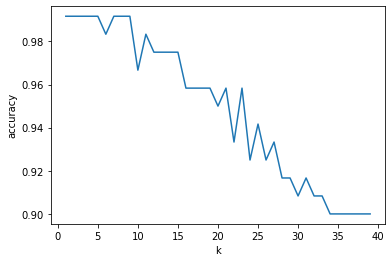

In [20]:
# find best k value
import matplotlib.pyplot as plt
score_list=[]

for each in range(1,40):
    knn2=KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
plt.plot(range(1,40),score_list)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

## Support Vector Machine

In [37]:
from sklearn.svm import SVC
svm=SVC(random_state=1,gamma="auto")
svm.fit(x_train,y_train)


SVC(gamma='auto', random_state=1)

In [39]:
svm_pred=svm.predict(x_test)

f1_svm=f1_score(y_test,svm_pred)
precision_svm = precision_score(y_test, svm_pred)
recall_svm = recall_score(y_test, svm_pred)

print("SVM f1 score: ",f1_svm)
print("SVM Precision: ",precision_svm)
print("SVM Recall: ", recall_svm)
print("SVM accuracy score: ",svm.score(x_test,y_test))

SVM f1 score:  0.972972972972973
SVM Precision:  1.0
SVM Recall:  0.9473684210526315
SVM accuracy score:  0.9666666666666667


## hyper parameter

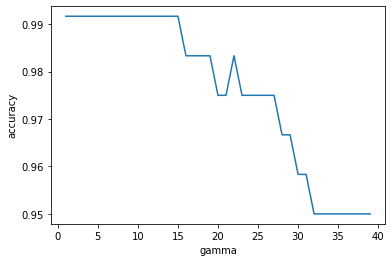

In [53]:
# find best k value
import matplotlib.pyplot as plt
score_list=[]

for each in range(1,40):
    svm2=SVC(gamma=each)
    svm2.fit(x_train,y_train)
    score_list.append(svm2.score(x_test,y_test))
plt.plot(range(1,40),score_list)
plt.xlabel("gamma")
plt.ylabel("accuracy")
plt.show()

## Decision Tree Classification

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [24]:
dt_pred=dt.predict(x_test)

f1_dt=f1_score(y_test,dt_pred)
precision_dt = precision_score(y_test, dt_pred)
recall_dt = recall_score(y_test, dt_pred)## hyper parameter

print("DT f1 score: ",f1_dt)
print("DT Precision: ",precision_dt)
print("DT Recall: ",recall_dt)
print("DT accuracy score: ",dt.score(x_test,y_test))

DT f1 score:  0.9866666666666666
DT Precision:  1.0
DT Recall:  0.9736842105263158
DT accuracy score:  0.9833333333333333


## hyper parameter

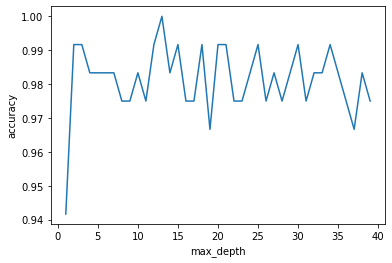

In [44]:
# find best k value
import matplotlib.pyplot as plt
score_list=[]

for each in range(1,40):
    dt2=DecisionTreeClassifier(max_depth=each)
    dt2.fit(x_train,y_train)
    score_list.append(dt2.score(x_test,y_test))
plt.plot(range(1,40),score_list)
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.show()

## Random Forest Classification

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [26]:
rf_pred=rf.predict(x_test)

f1_rf=f1_score(y_test,rf_pred)
precision_rf = precision_score(y_test, rf_pred)
recall_rf = recall_score(y_test, rf_pred)


print("RF f1 score: ",f1_rf)
print("RF Precision: ",precision_rf)
print("RF Recall:",recall_rf)
print("RF accuracy score: ",rf.score(x_test,y_test))

RF f1 score:  1.0
RF Precision:  1.0
RF Recall: 1.0
RF accuracy score:  1.0


## hyper parameter

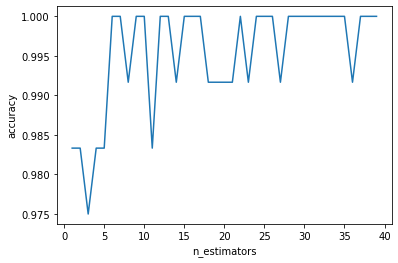

In [46]:
# find best k value
import matplotlib.pyplot as plt
score_list=[]## hyper parameter

for each in range(1,40):
    rf2=RandomForestClassifier(n_estimators=each)
    rf2.fit(x_train,y_train)
    score_list.append(rf2.score(x_test,y_test))
plt.plot(range(1,40),score_list)
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.show()